# Les bibliothèques nécessaires 

In [4]:
import numpy as np
import pydicom as dicom
import os
import cv2

import matplotlib.pyplot as plt
from glob import glob
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans

# Lecture des images dicom:

In [5]:
#      
# Parcourir toutes les images et les enregistrer dans une liste.
# 

PathDicom = "AAA/DICOM/S00001/SER00001/"
lstFilesDCM = []  # créer une liste vide.
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
            lstFilesDCM.append(os.path.join(dirName,filename))

In [16]:
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

print(int(RefDs.Rows))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))


512
(0.54296875, 0.54296875, 3.2)


In [18]:
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

print(x)
print(y)

[  0.           0.54296875   1.0859375    1.62890625   2.171875
   2.71484375   3.2578125    3.80078125   4.34375      4.88671875
   5.4296875    5.97265625   6.515625     7.05859375   7.6015625
   8.14453125   8.6875       9.23046875   9.7734375   10.31640625
  10.859375    11.40234375  11.9453125   12.48828125  13.03125
  13.57421875  14.1171875   14.66015625  15.203125    15.74609375
  16.2890625   16.83203125  17.375       17.91796875  18.4609375
  19.00390625  19.546875    20.08984375  20.6328125   21.17578125
  21.71875     22.26171875  22.8046875   23.34765625  23.890625
  24.43359375  24.9765625   25.51953125  26.0625      26.60546875
  27.1484375   27.69140625  28.234375    28.77734375  29.3203125
  29.86328125  30.40625     30.94921875  31.4921875   32.03515625
  32.578125    33.12109375  33.6640625   34.20703125  34.75
  35.29296875  35.8359375   36.37890625  36.921875    37.46484375
  38.0078125   38.55078125  39.09375     39.63671875  40.1796875
  40.72265625  41.265625   

In [9]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    blur = cv2.GaussianBlur(ds.pixel_array,(5,5),0)
    # store the raw image data1
    
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = blur

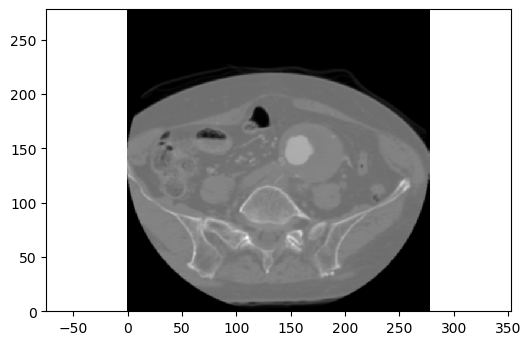

In [10]:
plt.figure(dpi=100)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 80]))